#### Import dependecies

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Import CSV file to dataframe

In [2]:
df = pd.read_csv('C:\\Users\\Teck Hock\\Downloads\\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

#### Check if columns have the right data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### Change column "created_at" to Datetime

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])

#### Find median and mean of each column

In [7]:
df.median()

order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64

In [8]:
df.mean()

order_id        2500.5000
shop_id           50.0788
user_id          849.0924
order_amount    3145.1280
total_items        8.7872
dtype: float64

In [9]:
x = df['shop_id']
y = df['order_amount']

#### Scatter plot to find outliers

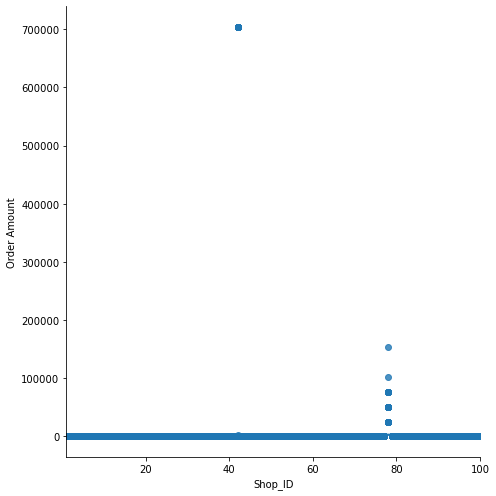

In [10]:
df_plot = pd.DataFrame({
        'Shop_ID': x,
        'Order Amount': y
    })
    
sns.lmplot('Shop_ID', 'Order Amount', data=df_plot, height=7)
    

### Scatter plot shows that there are a few outliers
#### We can remove the outliers and calculate the average order value to better represent the average of the majority order value or 
#### Calculate average order value for each store instead.

In [11]:
#Use 75 Percentile(390) of order_amount we got from df.describe() as a cut of point for outliers
df_75percentile = df[df['order_amount'] <= 390]

#### Find the average order amount with new dataframe

In [12]:
df_75percentile.mean()

order_id        2513.408740
shop_id           49.369571
user_id          850.266454
order_amount     230.459366
total_items        1.566747
dtype: float64

#### Average is now $230

### Calculate the average order value for each store

In [13]:
df_grouped_by_shop = df.drop(['order_id','user_id'],1).groupby('shop_id').mean()

In [14]:
df_grouped_by_shop

,order_amount,total_items
shop_id,,
1,308.818182,1.954545
2,174.327273,1.854545
3,305.250000,2.062500
4,258.509804,2.019608
5,290.311111,2.044444
...,...,...
96,330.000000,2.156863
97,324.000000,2.000000
98,245.362069,1.844828


#### Calculate the average order value per item

In [15]:
df['dollar_per_item'] = df['order_amount']/df['total_items']

In [16]:
df['dollar_per_item'].mean()

387.7428